# "2022_제주대_빅데이터분석 공공데이터 활용 및 지리데이터 시각화"
> "2022년 11월 공공데이터 활용 및 지리데이터 시각화"

- toc:true
- branch: master
- badges: true
- comments: true
- author: leehojun
- categories: [python, 데이터분석, pandas, folium, geopandas]

## pandas를 이용한 크롤링

In [ ]:
import numpy as np # 수치분석(선형대수)
import pandas as pd # 데이터 분석

In [ ]:
# pd.read_html, pd.read_excel, pd.read_csv, pd.read_json...
tables = pd.read_html('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC')

In [ ]:
# Ctrl + enter, Alt + enter
tables[0]

Unnamed: 0_level_0   2016          2017          2018          2019         \
   Unnamed: 0_level_1     인구   인구밀도     인구   인구밀도     인구   인구밀도     인구   인구밀도   
0                   계  51218    510  51362    512  51607    514  51709    515   
1                  서울   9843  16263   9766  16136   9705  16034   9662  15964   
2                  부산   3447   4477   3424   4447   3400   4416   3373   4380   
3                  대구   2461   2786   2458   2782   2450   2773   2432   2753   
4                  인천   2907   2736   2924   2750   2939   2764   2944   2769   
5                  광주   1502   2997   1495   2984   1493   2980   1494   2980   
6                  대전   1536   2848   1528   2832   1518   2813   1509   2796   
7                  울산   1166   1099   1159   1092   1154   1088   1147   1080   
8                  세종    234    504    266    571    304    653    331    712   
9                  경기  12600   1237  12786   1255  13031   1279  13238   1299   
10                 강원   1521     90   1521     90   1521     90   1517     90   
11                 충북   1601    216   1609    217   1619    219   1626    219   
12                 충남   2126    258   2153    262   2180    265   2188    265   
13                 전북   1835    227   1829    227   1820    226   1803    223   
14                 전남   1798    146   1795    146   1790    145   1773    144   
15                 경북   2683    141   2675    141   2674    141   2665    140   
16                 경남   3338    317   3339    317   3356    318   3350    318   
17                 제주    618    334    635    343    653    353    660    356   
18                수도권  25350   2139  25476   2149  25675   2165  25844   2179   

     2020         
       인구   인구밀도  
0   51781    516  
1    9602  15865  
2    3344   4342  
3    2419   2738  
4    2951   2770  
5    1488   2969  
6    1500   2780  
7    1140   1073  
8     349    750  
9   13405   1315  
10   1515     90  
11   1632    220  
12   2204    267  
13   1792    222  
14   1764    143  
15   2655    140  
16   3350    318  
17    670    362  
18  25958   2188

In [ ]:
tables[1]
tables[2]
tables[3]
tables[4]
tables[4]['출생자수(명)'].sum()
format(tables[4]['출생자수(명)'].sum(), ',')

'66,122,894'

## request와 bs4를 사용한 크롤링

In [ ]:
import pandas as pd # 데이터 분석을 위한 모듈
import requests # 웹에서 데이터를 가져오기 위한 모듈
from bs4 import BeautifulSoup # 웹에서 가져온 데이터를 가공하기 위한 모듈

In [ ]:
url = 'https://ridibooks.com/category/bestsellers/2220'

In [ ]:
response = requests.get(url)
response.encoding = 'UTF-8'
html = response.text
html

In [ ]:
soup = BeautifulSoup(html, 'html.parser')
book = soup.select('h3 > a')
book

for num, item in enumerate(book, 1):
    print(num, item.text)
    print('https://ridibooks.com' + item['href'])

1 쏙쏙 들어오는 함수형 코딩
https://ridibooks.com/books/852001353?_rdt_sid=category_2220&_rdt_idx=0
2 스프링 부트 핵심 가이드
https://ridibooks.com/books/1160000073?_rdt_sid=category_2220&_rdt_idx=0
3 혼자 공부하는 컴퓨터 구조+운영체제
https://ridibooks.com/books/443001065?_rdt_sid=category_2220&_rdt_idx=0
4 소프트웨어 아키텍처 The Hard Parts
https://ridibooks.com/books/443001081?_rdt_sid=category_2220&_rdt_idx=0
5 모던 자바스크립트 Deep Dive
https://ridibooks.com/books/1160000024?_rdt_sid=category_2220&_rdt_idx=0
6 프로그래머의 뇌
https://ridibooks.com/books/852001285?_rdt_sid=category_2220&_rdt_idx=0
7 비전공자를 위한 이해할 수 있는 IT 지식
https://ridibooks.com/books/4489000001?_rdt_sid=category_2220&_rdt_idx=0
8 파이썬 기반 금융 인공지능
https://ridibooks.com/books/443001080?_rdt_sid=category_2220&_rdt_idx=0
9 좋은코드 나쁜코드
https://ridibooks.com/books/852001431?_rdt_sid=category_2220&_rdt_idx=0
10 데이터 중심 애플리케이션 설계
https://ridibooks.com/books/1160000074?_rdt_sid=category_2220&_rdt_idx=0
11 소프트웨어 아키텍처 101
https://ridibooks.com/books/443000966?_rdt_sid=category_2220&_rdt_i

In [ ]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%B5%9C%EC%8B%A0%EC%98%81%ED%99%94'

response = requests.get(url)
response.encoding = 'UTF-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')
book = soup.select('._text')

for num, item in enumerate(book, 1):
    print(num, item.text)

1 블랙 팬서: 와칸다 포에버
2 레티티아 라이트, 다나이 구리라, 루피타 뇽, 테노치 우에르타 메히아
3 자백
4 소지섭, 김윤진, 나나, 최광일
5 리멤버
6 이성민, 남주혁
7 극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교
8 블랙 아담
9 드웨인 존슨, 노아 센티네오, 피어스 브로스넌, 퀸테사 스윈들, 알디스 호지, 사라 샤이
10 에브리씽 에브리웨어 올 앳 원스
11 양자경, 스테파니 수, 키 호이 콴, 제이미 리 커티스
12 인생은 아름다워
13 류승룡, 염정아, 박세완, 옹성우, 심달기, 하현상
14 내 친한 친구의 아침식사
15 에릭 추, 이목, 송백위, 하사정


In [ ]:
url = 'https://paullab.co.kr/stock.html'

response = requests.get(url)
response.encoding = 'UTF-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')
book = soup.select('tbody')

for num, item in enumerate(book, 1):
    print(num, item.text)

In [ ]:
import pandas as pd

data = pd.read_html('https://paullab.co.kr/stock.html')
data[0]

,0,1
0,시가총액,"349조 2,323억원"
1,시가총액순위,위니브월드 1위
2,상장주식수,5969782550


## 공공데이터 포털 오픈 API 활용

In [ ]:
import requests

response = requests.get("https://api.odcloud.kr/api/15096996/v1/uddi:6738a90c-ec96-4245-a187-9528cea62904?page=1&perPage=10&serviceKey=3MCBWEYPV4%2BY4Un8XqdBpFBiaGQKGsEVpC1HIK1DCoHqjNlhaUGcwjBIJGDYeTaTOiG4GKJorKXpGpfNpOEjhQ%3D%3D")
response.text
response.json()

{'currentCount': 10,
 'data': [{'경도': '126.7772830',
   '데이터기준일자': '2021-11-30',
   '비고(m)': 51,
   '설명': '비고 51m의 원형 화구를 가진 오름이다. 거칠지 않은 산 체와 완만한 탐방로가 있어 여유로운 분위기의 오름이다.',
   '오름명': '아부오름',
   '오름영문명': 'abu',
   '위도': '33.44887500',
   '위치': '제주시 구좌읍 송당리',
   '표고(m)': '301.4'},
  {'경도': '126.8306516',
   '데이터기준일자': '2021-11-30',
   '비고(m)': 58,
   '설명': '비고 58m의 원형 화구를 지닌 화산체이다. 잡목들이 거의 없어 그늘을 찾기 어렵지만 짧은 시간 안에 큰 무리없이 탐방이 가능하다.',
   '오름명': '아끈다랑쉬',
   '오름영문명': 'akkeundalangswi',
   '위도': '33.47413717',
   '위치': '제주시 구좌읍 세화리',
   '표고(m)': '198.0'},
  {'경도': '126.8856750',
   '데이터기준일자': '2021-11-30',
   '비고(m)': 154,
   '설명': '비고 154m. 말굽형 형태의 오름. 산체가 밤알을 닮아 알밤오름이라 명칭되었다.',
   '오름명': '알밤오름',
   '오름영문명': 'albam',
   '위도': '33.48075700',
   '위치': '제주시 조천읍 선흘리',
   '표고(m)': '393.6'},
  {'경도': '126.7131350',
   '데이터기준일자': '2021-11-30',
   '비고(m)': 51,
   '설명': '비고 51m의 원추형 화구를 지닌 화산체이다.',
   '오름명': '알오름',
   '오름영문명': 'al',
   '위도': '33.48974600',
   '위치': '서귀포시 성산읍 시흥리',
   '표고(m)': '145.9'}

In [ ]:
import requests

response = requests.get("https://api.odcloud.kr/api/15096996/v1/uddi:6738a90c-ec96-4245-a187-9528cea62904?page=2&perPage=10&serviceKey=3MCBWEYPV4%2BY4Un8XqdBpFBiaGQKGsEVpC1HIK1DCoHqjNlhaUGcwjBIJGDYeTaTOiG4GKJorKXpGpfNpOEjhQ%3D%3D")
response.text
response.json()

{'currentCount': 10,
 'data': [{'경도': '126.7629700',
   '데이터기준일자': '2021-11-30',
   '비고(m)': 103,
   '설명': '비고 103m의 오름. 동쪽 봉우리와 서쪽 봉우리에 바윗돌이 박혀 있고. 양쪽 봉우리 사이 북사면으로 패인 골짜기가 북동쪽으로 벌어진 말굽형 화구를 이룬다.',
   '오름명': '밧돌오름',
   '오름영문명': 'botdol',
   '위도': '33.46071600',
   '위치': '제주시 구좌읍 송당리',
   '표고(m)': '352.8'},
  {'경도': '126.2986070',
   '데이터기준일자': '2021-11-30',
   '비고(m)': 49,
   '설명': '비고 49m의 말굽형(서남향) 화구를 지닌 화산체이다. 초낭(참나무)가 많아 붙여진 명칭이다.',
   '오름명': '천아오름',
   '오름영문명': 'cheona',
   '위도': '33.40491900',
   '위치': '제주시 한림읍 상대리',
   '표고(m)': '133.6'},
  {'경도': '126.6037370',
   '데이터기준일자': '2021-11-30',
   '비고(m)': 96,
   '설명': '비고 96m의 원형 화구를 지닌 화산체이다.',
   '오름명': '칡오름',
   '오름영문명': 'chik',
   '위도': '33.28332900',
   '위치': '서귀포시 상효동',
   '표고(m)': '271.0'},
  {'경도': '126.3675770',
   '데이터기준일자': '2021-11-30',
   '비고(m)': 132,
   '설명': '비고 132m의 말굽형 화구를 지닌 화산체이다. 소병악과 나란히 위치해있고 크기에 따라 대. 소병악이라 명칭되었다.',
   '오름명': '대병악',
   '오름영문명': 'daebyeongak',
   '위도': '33.30624800',
   '위치': '서귀포시 안덕면 상창리',
 

In [ ]:
data = response.json()
for i in data:
    print(i)

currentCount
data
matchCount
page
perPage
totalCount


In [ ]:
data['page']

1

In [ ]:
data['data']

[{'경도': '126.7772830',
  '데이터기준일자': '2021-11-30',
  '비고(m)': 51,
  '설명': '비고 51m의 원형 화구를 가진 오름이다. 거칠지 않은 산 체와 완만한 탐방로가 있어 여유로운 분위기의 오름이다.',
  '오름명': '아부오름',
  '오름영문명': 'abu',
  '위도': '33.44887500',
  '위치': '제주시 구좌읍 송당리',
  '표고(m)': '301.4'},
 {'경도': '126.8306516',
  '데이터기준일자': '2021-11-30',
  '비고(m)': 58,
  '설명': '비고 58m의 원형 화구를 지닌 화산체이다. 잡목들이 거의 없어 그늘을 찾기 어렵지만 짧은 시간 안에 큰 무리없이 탐방이 가능하다.',
  '오름명': '아끈다랑쉬',
  '오름영문명': 'akkeundalangswi',
  '위도': '33.47413717',
  '위치': '제주시 구좌읍 세화리',
  '표고(m)': '198.0'},
 {'경도': '126.8856750',
  '데이터기준일자': '2021-11-30',
  '비고(m)': 154,
  '설명': '비고 154m. 말굽형 형태의 오름. 산체가 밤알을 닮아 알밤오름이라 명칭되었다.',
  '오름명': '알밤오름',
  '오름영문명': 'albam',
  '위도': '33.48075700',
  '위치': '제주시 조천읍 선흘리',
  '표고(m)': '393.6'},
 {'경도': '126.7131350',
  '데이터기준일자': '2021-11-30',
  '비고(m)': 51,
  '설명': '비고 51m의 원추형 화구를 지닌 화산체이다.',
  '오름명': '알오름',
  '오름영문명': 'al',
  '위도': '33.48974600',
  '위치': '서귀포시 성산읍 시흥리',
  '표고(m)': '145.9'},
 {'경도': '126.7571260',
  '데이터기준일자': '2021-11-30',
  '비고(m)': 93

In [ ]:
import pandas as pd

df = pd.DataFrame(data['data'])
df

,경도,데이터기준일자,비고(m),설명,오름명,오름영문명,위도,위치,표고(m)
0,126.7772830,2021-11-30,51,비고 51m의 원형 화구를 가진 오름이다. 거칠지 않은 산 체와 완만한 탐방로가 있...,아부오름,abu,33.44887500,제주시 구좌읍 송당리,301.4
1,126.8306516,2021-11-30,58,비고 58m의 원형 화구를 지닌 화산체이다. 잡목들이 거의 없어 그늘을 찾기 어렵지...,아끈다랑쉬,akkeundalangswi,33.47413717,제주시 구좌읍 세화리,198.0
2,126.8856750,2021-11-30,154,비고 154m. 말굽형 형태의 오름. 산체가 밤알을 닮아 알밤오름이라 명칭되었다.,알밤오름,albam,33.48075700,제주시 조천읍 선흘리,393.6
3,126.7131350,2021-11-30,51,비고 51m의 원추형 화구를 지닌 화산체이다.,알오름,al,33.48974600,서귀포시 성산읍 시흥리,145.9
4,126.7571260,2021-11-30,93,비고 93m의 말굽형 형태의 오름이다. 오름 전체에 초지가 있고. 소나무. 청미래덩...,안돌오름,andol,33.45581400,제주시 구좌읍 송당리,368.1
5,126.6081240,2021-11-30,91,비고 91m. 말굽형(북동향) 형태의 오름. 오름 기슭 아래에 있는 샘터를 중심으로...,안세미,ansemi,33.46709800,제주시 봉개동,396.4
6,126.7897666,2021-11-30,132,비고 132m의 원형 화구를 지닌 화산체이다. 예부터 약초가 많이 자생하고 있어 백...,백약이오름,baeg-yagi,33.43680944,서귀포시 표선면 성읍리,356.9
7,126.2658540,2021-11-30,43,비고 43m의 북향 말굽형 굼부리를 지닌 화산체. 비고도 낮고 규모도 작은 편이다.,밝은오름,balgeun,33.36093500,제주시 한림읍 상명리,182.5
8,126.6538018,2021-11-30,142,비고 142m의 복합형 화구를 지닌 화산체이다. 바농은 바늘의 제주 방언을 말하며 ...,바농오름,banong,33.45377549,제주시 조천읍 교래리,552.1
9,126.7632900,2021-11-30,109,비고 109m의 말굽형 화산체이다.,비치미오름,bichimi,33.42639500,제주시 구좌읍 송당리,344.1


In [ ]:
import requests

response = requests.get("https://api.odcloud.kr/api/15096996/v1/uddi:6738a90c-ec96-4245-a187-9528cea62904?page=1&perPage=100&serviceKey=3MCBWEYPV4%2BY4Un8XqdBpFBiaGQKGsEVpC1HIK1DCoHqjNlhaUGcwjBIJGDYeTaTOiG4GKJorKXpGpfNpOEjhQ%3D%3D")
response.text
len(response.json()['data'])

90

In [ ]:
response = requests.get("https://api.odcloud.kr/api/15096996/v1/uddi:6738a90c-ec96-4245-a187-9528cea62904?page=1&perPage=100&serviceKey=3MCBWEYPV4%2BY4Un8XqdBpFBiaGQKGsEVpC1HIK1DCoHqjNlhaUGcwjBIJGDYeTaTOiG4GKJorKXpGpfNpOEjhQ%3D%3D")


In [ ]:
import requests

url = []

for i in range(1, 10):
    url.append(f"https://api.odcloud.kr/api/15096996/v1/uddi:6738a90c-ec96-4245-a187-9528cea62904?page={i}&perPage=10&serviceKey=3MCBWEYPV4%2BY4Un8XqdBpFBiaGQKGsEVpC1HIK1DCoHqjNlhaUGcwjBIJGDYeTaTOiG4GKJorKXpGpfNpOEjhQ%3D%3D")

url

['https://api.odcloud.kr/api/15096996/v1/uddi:6738a90c-ec96-4245-a187-9528cea62904?page=1&perPage=10&serviceKey=3MCBWEYPV4%2BY4Un8XqdBpFBiaGQKGsEVpC1HIK1DCoHqjNlhaUGcwjBIJGDYeTaTOiG4GKJorKXpGpfNpOEjhQ%3D%3D',
 'https://api.odcloud.kr/api/15096996/v1/uddi:6738a90c-ec96-4245-a187-9528cea62904?page=2&perPage=10&serviceKey=3MCBWEYPV4%2BY4Un8XqdBpFBiaGQKGsEVpC1HIK1DCoHqjNlhaUGcwjBIJGDYeTaTOiG4GKJorKXpGpfNpOEjhQ%3D%3D',
 'https://api.odcloud.kr/api/15096996/v1/uddi:6738a90c-ec96-4245-a187-9528cea62904?page=3&perPage=10&serviceKey=3MCBWEYPV4%2BY4Un8XqdBpFBiaGQKGsEVpC1HIK1DCoHqjNlhaUGcwjBIJGDYeTaTOiG4GKJorKXpGpfNpOEjhQ%3D%3D',
 'https://api.odcloud.kr/api/15096996/v1/uddi:6738a90c-ec96-4245-a187-9528cea62904?page=4&perPage=10&serviceKey=3MCBWEYPV4%2BY4Un8XqdBpFBiaGQKGsEVpC1HIK1DCoHqjNlhaUGcwjBIJGDYeTaTOiG4GKJorKXpGpfNpOEjhQ%3D%3D',
 'https://api.odcloud.kr/api/15096996/v1/uddi:6738a90c-ec96-4245-a187-9528cea62904?page=5&perPage=10&serviceKey=3MCBWEYPV4%2BY4Un8XqdBpFBiaGQKGsEVpC1HIK1DCoHqjNlhaU

In [ ]:
df[['경도', '위도', '오름명', '설명']]

,경도,위도,오름명,설명
0,126.7772830,33.44887500,아부오름,비고 51m의 원형 화구를 가진 오름이다. 거칠지 않은 산 체와 완만한 탐방로가 있...
1,126.8306516,33.47413717,아끈다랑쉬,비고 58m의 원형 화구를 지닌 화산체이다. 잡목들이 거의 없어 그늘을 찾기 어렵지...
2,126.8856750,33.48075700,알밤오름,비고 154m. 말굽형 형태의 오름. 산체가 밤알을 닮아 알밤오름이라 명칭되었다.
3,126.7131350,33.48974600,알오름,비고 51m의 원추형 화구를 지닌 화산체이다.
4,126.7571260,33.45581400,안돌오름,비고 93m의 말굽형 형태의 오름이다. 오름 전체에 초지가 있고. 소나무. 청미래덩...
5,126.6081240,33.46709800,안세미,비고 91m. 말굽형(북동향) 형태의 오름. 오름 기슭 아래에 있는 샘터를 중심으로...
6,126.7897666,33.43680944,백약이오름,비고 132m의 원형 화구를 지닌 화산체이다. 예부터 약초가 많이 자생하고 있어 백...
7,126.2658540,33.36093500,밝은오름,비고 43m의 북향 말굽형 굼부리를 지닌 화산체. 비고도 낮고 규모도 작은 편이다.
8,126.6538018,33.45377549,바농오름,비고 142m의 복합형 화구를 지닌 화산체이다. 바농은 바늘의 제주 방언을 말하며 ...
9,126.7632900,33.42639500,비치미오름,비고 109m의 말굽형 화산체이다.


## 공간데이터(지리정보데이터)

* 좌표 정보 : google map, http://map.esran.com/

* GIS(Geospatial Information System) : 데이터가 위치에 대한 정보를 갖고 있는 것

* QGIS를 이용한 folium 읍면동 지도분할(geojson)(https://youtu.be/c0EQWKN5kh4) - 유튜브에서 제주 QGIS 라고 입력하면 됩니다.

* 좌표(Point), 도로(Line), 도나 시에 영역(Polygon) 등

* 주요 표현 방법
    * 점(point) : 건축물, 시설 등
    * 선(line) : 경로, 네트워크, 철도 등
    * 면(ploygon) : 지역, 영역 등

* 주요 도구 및 라이브러리
    * QGIS : QGIS는 지리 정보 체계 응용 프로그램이며 데이터 뷰, 편집, 분석을 제공
    * Python의 folium, geopandas, networkx, shapely, finona

## 데이터 지도 시각화

### folium

In [1]:
!pip3 install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

m = folium.Map(
    location=[33.3783694, 126.5313539]
)

m

In [ ]:
import folium

m = folium.Map(
    location=[33.3783694, 126.5313539],
    zoom_start = 10
)

folium.Marker(
    [33.3783694, 126.5313539],
    popup = '<strong>hello</strong>',
    tooltip = 'Click'
).add_to(m)

m

In [4]:
import requests
import pandas as pd

response = requests.get("https://api.odcloud.kr/api/15096996/v1/uddi:6738a90c-ec96-4245-a187-9528cea62904?page=1&perPage=10&serviceKey=3MCBWEYPV4%2BY4Un8XqdBpFBiaGQKGsEVpC1HIK1DCoHqjNlhaUGcwjBIJGDYeTaTOiG4GKJorKXpGpfNpOEjhQ%3D%3D")
response.text
data = response.json()

df = pd.DataFrame(data['data'])
df

,경도,데이터기준일자,비고(m),설명,오름명,오름영문명,위도,위치,표고(m)
0,126.7772830,2021-11-30,51,비고 51m의 원형 화구를 가진 오름이다. 거칠지 않은 산 체와 완만한 탐방로가 있...,아부오름,abu,33.44887500,제주시 구좌읍 송당리,301.4
1,126.8306516,2021-11-30,58,비고 58m의 원형 화구를 지닌 화산체이다. 잡목들이 거의 없어 그늘을 찾기 어렵지...,아끈다랑쉬,akkeundalangswi,33.47413717,제주시 구좌읍 세화리,198.0
2,126.8856750,2021-11-30,154,비고 154m. 말굽형 형태의 오름. 산체가 밤알을 닮아 알밤오름이라 명칭되었다.,알밤오름,albam,33.48075700,제주시 조천읍 선흘리,393.6
3,126.7131350,2021-11-30,51,비고 51m의 원추형 화구를 지닌 화산체이다.,알오름,al,33.48974600,서귀포시 성산읍 시흥리,145.9
4,126.7571260,2021-11-30,93,비고 93m의 말굽형 형태의 오름이다. 오름 전체에 초지가 있고. 소나무. 청미래덩...,안돌오름,andol,33.45581400,제주시 구좌읍 송당리,368.1
5,126.6081240,2021-11-30,91,비고 91m. 말굽형(북동향) 형태의 오름. 오름 기슭 아래에 있는 샘터를 중심으로...,안세미,ansemi,33.46709800,제주시 봉개동,396.4
6,126.7897666,2021-11-30,132,비고 132m의 원형 화구를 지닌 화산체이다. 예부터 약초가 많이 자생하고 있어 백...,백약이오름,baeg-yagi,33.43680944,서귀포시 표선면 성읍리,356.9
7,126.2658540,2021-11-30,43,비고 43m의 북향 말굽형 굼부리를 지닌 화산체. 비고도 낮고 규모도 작은 편이다.,밝은오름,balgeun,33.36093500,제주시 한림읍 상명리,182.5
8,126.6538018,2021-11-30,142,비고 142m의 복합형 화구를 지닌 화산체이다. 바농은 바늘의 제주 방언을 말하며 ...,바농오름,banong,33.45377549,제주시 조천읍 교래리,552.1
9,126.7632900,2021-11-30,109,비고 109m의 말굽형 화산체이다.,비치미오름,bichimi,33.42639500,제주시 구좌읍 송당리,344.1


In [6]:
df[['경도', '위도', '오름명', '설명']]

,경도,위도,오름명,설명
0,126.7772830,33.44887500,아부오름,비고 51m의 원형 화구를 가진 오름이다. 거칠지 않은 산 체와 완만한 탐방로가 있...
1,126.8306516,33.47413717,아끈다랑쉬,비고 58m의 원형 화구를 지닌 화산체이다. 잡목들이 거의 없어 그늘을 찾기 어렵지...
2,126.8856750,33.48075700,알밤오름,비고 154m. 말굽형 형태의 오름. 산체가 밤알을 닮아 알밤오름이라 명칭되었다.
3,126.7131350,33.48974600,알오름,비고 51m의 원추형 화구를 지닌 화산체이다.
4,126.7571260,33.45581400,안돌오름,비고 93m의 말굽형 형태의 오름이다. 오름 전체에 초지가 있고. 소나무. 청미래덩...
5,126.6081240,33.46709800,안세미,비고 91m. 말굽형(북동향) 형태의 오름. 오름 기슭 아래에 있는 샘터를 중심으로...
6,126.7897666,33.43680944,백약이오름,비고 132m의 원형 화구를 지닌 화산체이다. 예부터 약초가 많이 자생하고 있어 백...
7,126.2658540,33.36093500,밝은오름,비고 43m의 북향 말굽형 굼부리를 지닌 화산체. 비고도 낮고 규모도 작은 편이다.
8,126.6538018,33.45377549,바농오름,비고 142m의 복합형 화구를 지닌 화산체이다. 바농은 바늘의 제주 방언을 말하며 ...
9,126.7632900,33.42639500,비치미오름,비고 109m의 말굽형 화산체이다.


In [9]:
df['경도']

0    126.7772830
1    126.8306516
2    126.8856750
3    126.7131350
4    126.7571260
5    126.6081240
6    126.7897666
7    126.2658540
8    126.6538018
9    126.7632900
Name: 경도, dtype: object

In [10]:
df[['경도']]

,경도
0,126.7772830
1,126.8306516
2,126.8856750
3,126.7131350
4,126.7571260
5,126.6081240
6,126.7897666
7,126.2658540
8,126.6538018
9,126.7632900


In [7]:
for idx in df[['경도', '위도', '오름명', '설명']].index:
    print(df[['경도', '위도', '오름명', '설명']].loc[idx])

경도                                           126.7772830
위도                                           33.44887500
오름명                                                 아부오름
설명     비고 51m의 원형 화구를 가진 오름이다. 거칠지 않은 산 체와 완만한 탐방로가 있...
Name: 0, dtype: object
경도                                           126.8306516
위도                                           33.47413717
오름명                                                아끈다랑쉬
설명     비고 58m의 원형 화구를 지닌 화산체이다. 잡목들이 거의 없어 그늘을 찾기 어렵지...
Name: 1, dtype: object
경도                                       126.8856750
위도                                       33.48075700
오름명                                             알밤오름
설명     비고 154m. 말굽형 형태의 오름. 산체가 밤알을 닮아 알밤오름이라 명칭되었다.
Name: 2, dtype: object
경도                   126.7131350
위도                   33.48974600
오름명                          알오름
설명     비고 51m의 원추형 화구를 지닌 화산체이다.
Name: 3, dtype: object
경도                                           126.7571260
위도                                           33.455

In [ ]:
import folium

m = folium.Map(
    location=[33.3783694, 126.5313539],
    zoom_start = 10
)

for idx in df[['경도', '위도', '오름명', '설명']].index:
    # print(df.loc[idx])
    오름명 = df.loc[idx]['오름명']
    위도 = df.loc[idx]['위도']
    경도 = df.loc[idx]['경도']
    folium.Marker(
        [위도, 경도],
        popup = f'<strong>{오름명}</strong>',
        tooltip = 'Click'
    ).add_to(m)
    
m

In [42]:
import folium

m = folium.Map(
    location = [33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start = 10
)

tooltip = 'Click!!'

folium.Marker(
    [33.3684955195788, 126.52918183373025],
    popup = '<div style="width:200px">한라산</div><img style="width:40px" src="https://cdn.pixabay.com/photo/2017/04/22/08/50/winter-2250856_960_720.jpg">',
    tooltip = tooltip,
    icon = folium.Icon(color='blue', icon='info-sign')
).add_to(m)

folium.Marker(
    [33.51048502651309, 126.49132121516628],
    popup = '제주국제공항',
    tooltip = tooltip,
    icon = folium.Icon(color='green', icon='bookmark')
).add_to(m)

folium.Marker(
    [33.508461049711265, 126.54097984346038],
    popup = '바울랩',
    tooltip = tooltip
).add_to(m)

m

In [46]:
m = folium.Map(
    location = [33.3684955195788, 126.52918183373025],
    zoom_start = 10
)

tooltip = 'Click!!'

folium.Marker(
    [33.3684955195788, 126.52918183373025],
    popup = '한라산',
    tooltip = tooltip,
    icon = folium.Icon(color='green', icon='bookmark')
).add_to(m)

folium.Circle(
    [33.3684955195788, 126.52918183373025],
    radius = 10000,
    color = 'red',
    fill = True
).add_to(m)

m


In [47]:
m = folium.Map(
    location = [33.3684955195788, 126.52918183373025],
    zoom_start = 10
)

tooltip = 'Click!!'

folium.Marker(
    [33.3684955195788, 126.52918183373025],
    popup = '한라산',
    tooltip = tooltip,
    icon = folium.Icon(color='green', icon='bookmark')
).add_to(m)

folium.Circle(
    [33.3684955195788, 126.52918183373025],
    radius = 10000,
    color = 'red',
    fill = True
).add_to(m)

# 실거리를 측정하는 라이브러리도 있습니다.
folium.PolyLine(
    locations = [[33.3684955195788, 126.52918183373025], [33.51048502651309, 126.49132121516628]],
    tooltip = tooltip
).add_to(m)

m

In [48]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
from haversine import haversine

#haversine(위치1, 위치2, unit = 'km')

In [51]:
haversine([33.3684955195788, 126.52918183373025], [33.51048502651309, 126.49132121516628], unit = 'km')

16.17464870645158

In [ ]:
# 그룹박스, 체크박스 

In [53]:
import numpy as np
import pandas as pd
import folium

In [56]:
import folium
from folium.features import CustomIcon

m = folium.Map(
    location=[33.3783694, 126.5313539],
    zoom_start = 10
)

for idx in df[['경도', '위도', '오름명', '설명']].index:
    # print(df.loc[idx])

    icon_image = 'https://cdn.pixabay.com/photo/2017/04/22/08/50/winter-2250856_960_720.jpg'
    icon = CustomIcon(
        icon_image,
        icon_size = (20, 20),
        popup_anchor = (30, -30),
    )
    
    오름명 = df.loc[idx]['오름명']
    위도 = df.loc[idx]['위도']
    경도 = df.loc[idx]['경도']
    folium.Marker(
        [위도, 경도],
        popup = f'<strong>{오름명}</strong>',
        tooltip = 'Click',
        icon=icon
    ).add_to(m)
    
m

In [57]:
from folium.plugins import MarkerCluster

m = folium.Map(
    location = [33.3684955195788, 126.52918183373025],
    zoom_start = 10
)

locations = [[33.24275343637512, 126.31353238508069],
             [33.46220372339229, 126.31353238508069]]

cluster = MarkerCluster(locations = locations)
cluster.add_to(m)

m

In [ ]:
from folium.features import CustomIcon

m = folium.Map(
    location = [33.3684955195788, 126.52918183373025],
    zoom_start = 10
)

tooltip = 'Click!!'


for i in range(오름.shape[0]):

    icon_image = 'mountain.png'
    icon = CustomIcon(
        icon_image,
        icon_size = (20, 20),
        popup_anchor = (30, -30),
    )
    
    folium.Marker(
        [오름.iloc[i]['위도'], 오름.iloc[i]['경도']],
        popup = f'
{오름.iloc[i]["오름명"]}
\
        주차장 : {오름.iloc[i]["주차장"]}
\
        화장실 : {오름.iloc[i]["화장실"]}
',
        tooltip = tooltip,
        icon = icon
    ).add_to(m)

m


### geopandas

In [11]:
!pip3 install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.7 MB/s 
     |████████████████████████████████| 6.3 MB 52.2 MB/s 
     |████████████████████████████████| 16.7 MB 50.4 MB/s 


In [13]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point

In [14]:
x1, y1 = 1, 1
x2, y2 = 1, 3
x3, y3 = 2, 3
x4, y4 = 2, 1

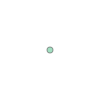

In [15]:
Point([x1, y1])

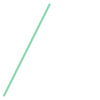

In [17]:
LineString([(x1, y1), (x3, y3)])

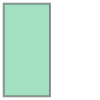

In [18]:
Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)])

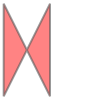

In [19]:
Polygon([(x1, y1), (x2, y2), (x4, y4), (x3, y3)])

* Polygon GIS 데이터 shapefile은 3개 이상의 파일이 세트로 한 폴더에 있어야 합니다. dbf,prj,shp,shx 확장자를 가지고 있습니다.
    * dbf : dBase(데이터베이스), 데이터프레임 형태 정보
    * prj : 좌표 정보(좌표계), 좌표가 없다면 파일이 없음
    * shp : vector 형태의 도형 정보
    * shx : vector 형태의 도형 정보(활용되는 SW에 따라 다른 파일을 읽음)

* http://www.gisdeveloper.co.kr/?p=2332 접속 후 2022 데이터 다운로드

* 국토교통부의 국가공간정보포털에서도 데이터를 얻을 수 있음(http://data.nsdi.go.kr/)

In [20]:
전국시군구 = gpd.GeoDataFrame.from_file('ctp_rvn.shp', encoding='cp949')

In [23]:
전국시군구.head(10)
전국시군구.tail(10)

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
12,45,Jeollabuk-do,전라북도,"MULTIPOLYGON (((902676.539 1717491.597, 902679..."
13,46,Jellanam-do,전라남도,"MULTIPOLYGON (((946598.396 1555245.584, 946595..."
14,47,Gyeongsangbuk-do,경상북도,"MULTIPOLYGON (((1179680.743 1750939.312, 11796..."
15,48,Gyeongsangnam-do,경상남도,"MULTIPOLYGON (((1053643.218 1612344.022, 10536..."
16,50,Jeju-do,제주특별자치도,"MULTIPOLYGON (((885004.560 1458756.461, 884996..."


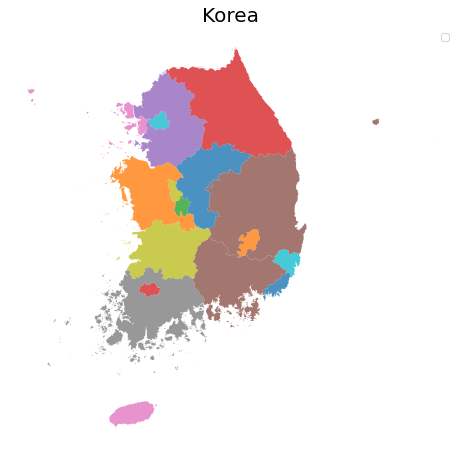

In [25]:
import matplotlib.pyplot as plt

ax = 전국시군구.plot(column='CTP_ENG_NM', figsize=(8, 8), alpha=0.8)
ax.set_title("Korea", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   경도       10 non-null     object
 1   데이터기준일자  10 non-null     object
 2   비고(m)    10 non-null     int64 
 3   설명       10 non-null     object
 4   오름명      10 non-null     object
 5   오름영문명    10 non-null     object
 6   위도       10 non-null     object
 7   위치       10 non-null     object
 8   표고(m)    10 non-null     object
dtypes: int64(1), object(8)
memory usage: 848.0+ bytes


In [27]:
df['경도'] = df['경도'].astype(float)
df['위도'] = df['위도'].astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   경도       10 non-null     float64
 1   데이터기준일자  10 non-null     object 
 2   비고(m)    10 non-null     int64  
 3   설명       10 non-null     object 
 4   오름명      10 non-null     object 
 5   오름영문명    10 non-null     object 
 6   위도       10 non-null     float64
 7   위치       10 non-null     object 
 8   표고(m)    10 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 848.0+ bytes


In [29]:
df['geometry'] = df.apply(lambda row: Point([row['경도'], row['위도']]), axis=1)
df = gpd.GeoDataFrame(df, geometry='geometry')

df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,경도,데이터기준일자,비고(m),설명,오름명,오름영문명,위도,위치,표고(m),geometry
0,126.777283,2021-11-30,51,비고 51m의 원형 화구를 가진 오름이다. 거칠지 않은 산 체와 완만한 탐방로가 있...,아부오름,abu,33.448875,제주시 구좌읍 송당리,301.4,POINT (126.77728 33.44888)
1,126.830652,2021-11-30,58,비고 58m의 원형 화구를 지닌 화산체이다. 잡목들이 거의 없어 그늘을 찾기 어렵지...,아끈다랑쉬,akkeundalangswi,33.474137,제주시 구좌읍 세화리,198.0,POINT (126.83065 33.47414)
2,126.885675,2021-11-30,154,비고 154m. 말굽형 형태의 오름. 산체가 밤알을 닮아 알밤오름이라 명칭되었다.,알밤오름,albam,33.480757,제주시 조천읍 선흘리,393.6,POINT (126.88568 33.48076)
3,126.713135,2021-11-30,51,비고 51m의 원추형 화구를 지닌 화산체이다.,알오름,al,33.489746,서귀포시 성산읍 시흥리,145.9,POINT (126.71313 33.48975)
4,126.757126,2021-11-30,93,비고 93m의 말굽형 형태의 오름이다. 오름 전체에 초지가 있고. 소나무. 청미래덩...,안돌오름,andol,33.455814,제주시 구좌읍 송당리,368.1,POINT (126.75713 33.45581)


In [30]:
# https://www.osgeo.kr/17

print(전국시군구.crs) # AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6656"]
print(df.crs)

PROJCS["PCS_ITRF2000_TM",GEOGCS["ITRF2000",DATUM["International_Terrestrial_Reference_Frame_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6656"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
None


In [31]:
df.crs = {'init':'epsg:4326'} #GPS(위경도 좌표) 죄표계
print(df.crs)

+init=epsg:4326 +type=crs


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [32]:
df = df.to_crs({'init':'epsg:5179'}) # 네이버지도에서 사용중인 좌표계

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


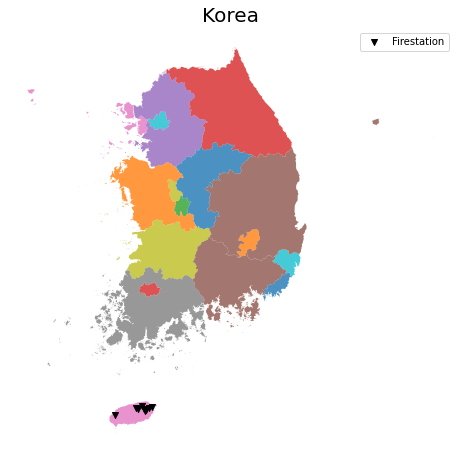

In [33]:
import matplotlib.pyplot as plt

ax = 전국시군구.plot(column="CTP_ENG_NM", figsize=(8,8), alpha=0.8)
df.plot(ax=ax, marker='v', color='black', label='Firestation')
ax.set_title("Korea", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()